# <center>Практика 3. EDA. Графический анализ данных

Полезная статья о визуализации в Python

https://habr.com/ru/company/ods/blog/323210/

In [37]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = [15, 7]
import pandas as pd

## <center> Датасет "Отток телефонных пользователей"
 

| Название переменной | Описание | Тип данных |
| --- | --- | --- |
| State | Буквенный код штата    | категориальный |
|Account length	  |Как долго клиент обслуживается компанией	|количественный
|Area code	|Префикс номера телефона	|количественный
|International plan	|Международный роуминг (подключен/не подключен)	|бинарный    
|Voice mail plan	|Голосовая почта (подключена/не подключена)	|бинарный    
|Number vmail messages	|Количество голосовых сообщений	|количественный    
|Total day minutes	|Общая длительность разговоров днем	|количественный    
|Total day calls	|Общее количество звонков днем	|количественный    
|Total day charge	|Общая сумма оплаты за услуги днем	|количественный    
|Total eve minutes	|Общая длительность разговоров вечером	|количественный    
|Total eve calls	|Общее количество звонков вечером	|количественный    
|Total eve charge	|Общая сумма оплаты за услуги вечером	|количественный    
|Total night minutes	|Общая длительность разговоров ночью	|количественный    
|Total night calls	|Общее количество звонков ночью	|количественный    
|Total night charge	|Общая сумма оплаты за услуги ночью	|количественный    
|Total intl minutes	|Общая длительность международных разговоров	|количественный    
|Total intl calls	|Общее количество международных разговоров	|количественный    
|Total intl charge	|Общая сумма оплаты за международные разговоры	|количественный    
|Customer service calls	|Число обращений в сервисный центр	|количественный

In [62]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [21]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

bool, int64, float64 и object — это типы признаков. Видим, что 1 признак — логический (bool), 3 признака имеют тип object и 16 признаков — числовые. Также с помощью метода info удобно быстро посмотреть на пропуски в данных, в нашем случае их нет, в каждом столбце по 3333 наблюдения.


Изменить тип колонки можно с помощью метода astype. Применим этот метод к признаку Churn и переведём его в int64:

In [68]:
df['Churn'] = df['Churn'].astype('int64')

Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре include.

In [25]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts. Посмотрим на распределение данных по нашей целевой переменной — Churn:

In [29]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Можно посмотреть доли, если указать normalize = True

In [31]:
df['Churn'].value_counts(normalize = True)

0    85.508551
1    14.491449
Name: Churn, dtype: float64

# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

In [43]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

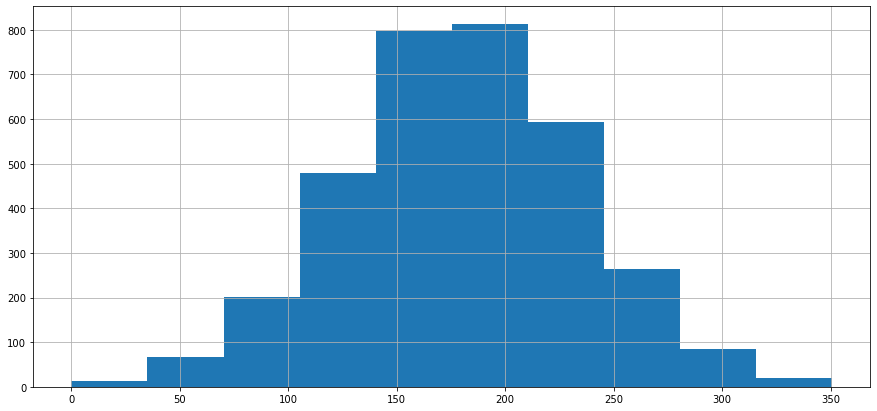

In [39]:
df['Total day minutes'].hist();

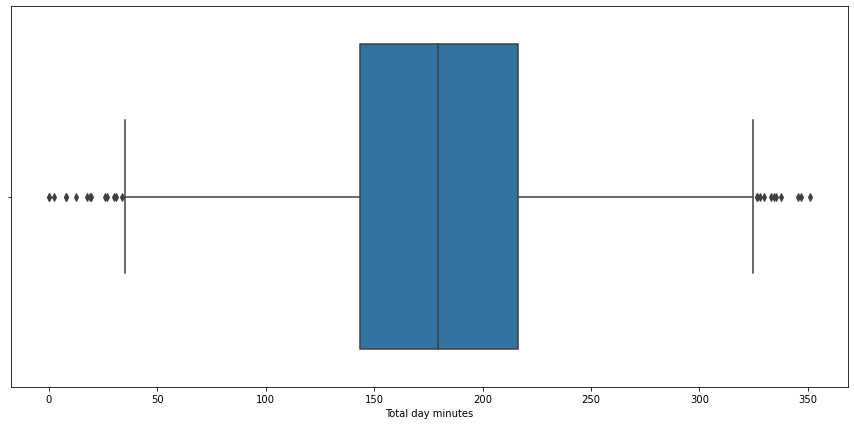

In [42]:
sns.boxplot(df['Total day minutes']);

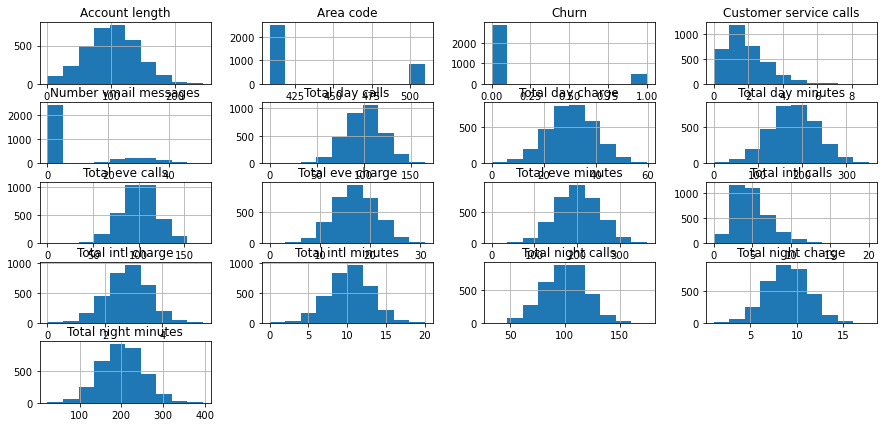

In [44]:
df.hist();

# 1.2. Категориальные
countplot

In [45]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [46]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

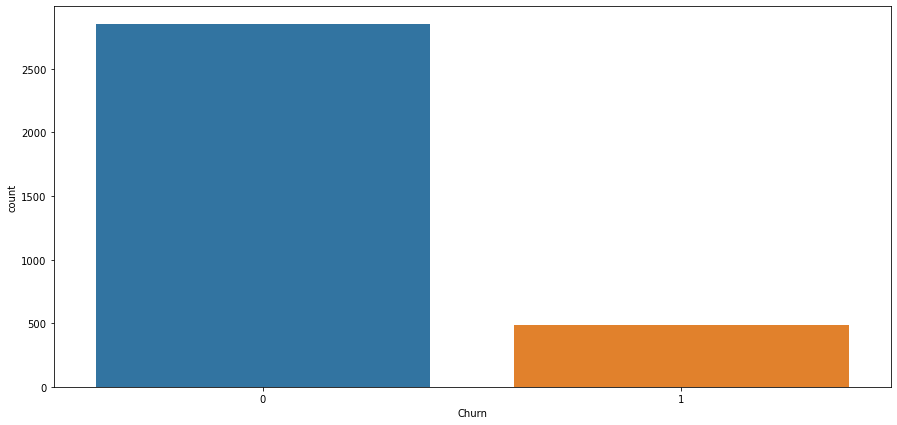

In [47]:
sns.countplot(df['Churn']);

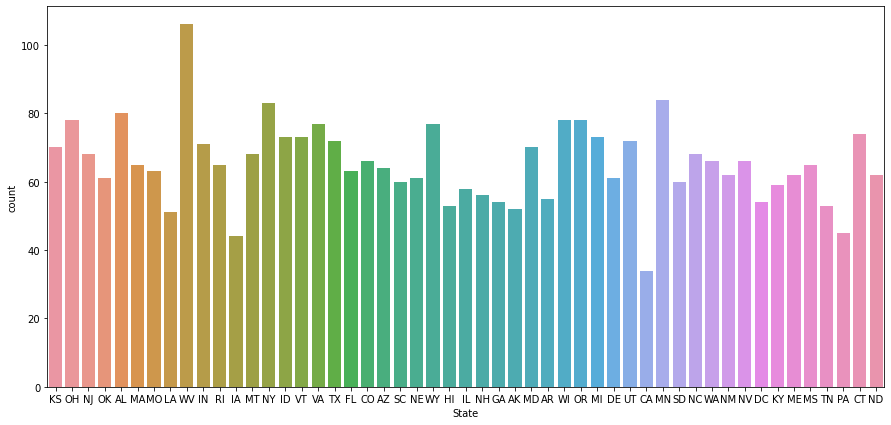

In [48]:
sns.countplot(df['State']);

In [54]:
df['State'].value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'WI'], dtype='object')

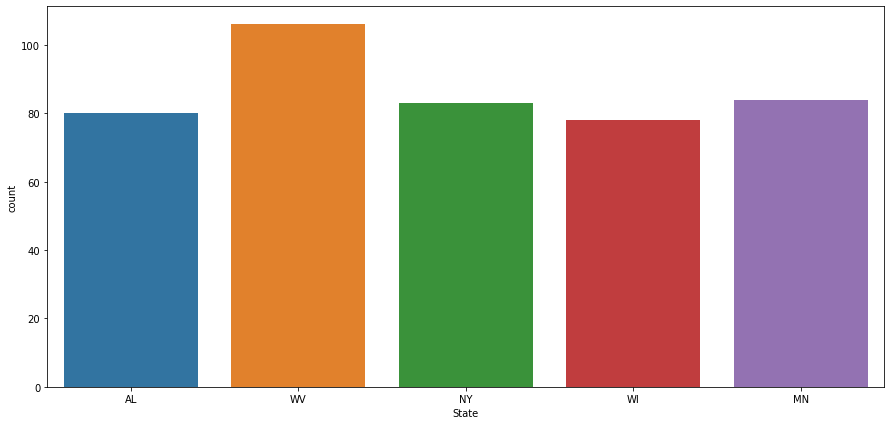

In [49]:
sns.countplot(df[df['State'].isin(
                             df['State'].value_counts().head().index)]['State']);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

In [55]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

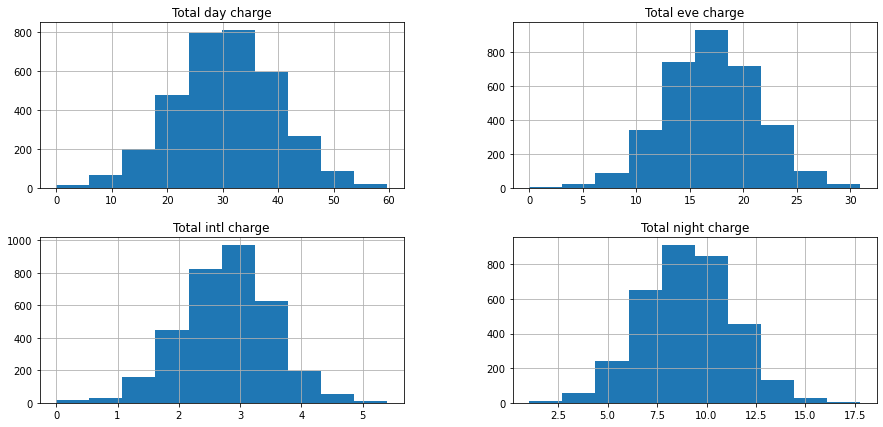

In [56]:
# Выделяем все столбцы, где в названии содержиться charge 
feat_charge = [f for f in df.columns if 'charge' in f]

df[feat_charge].hist();

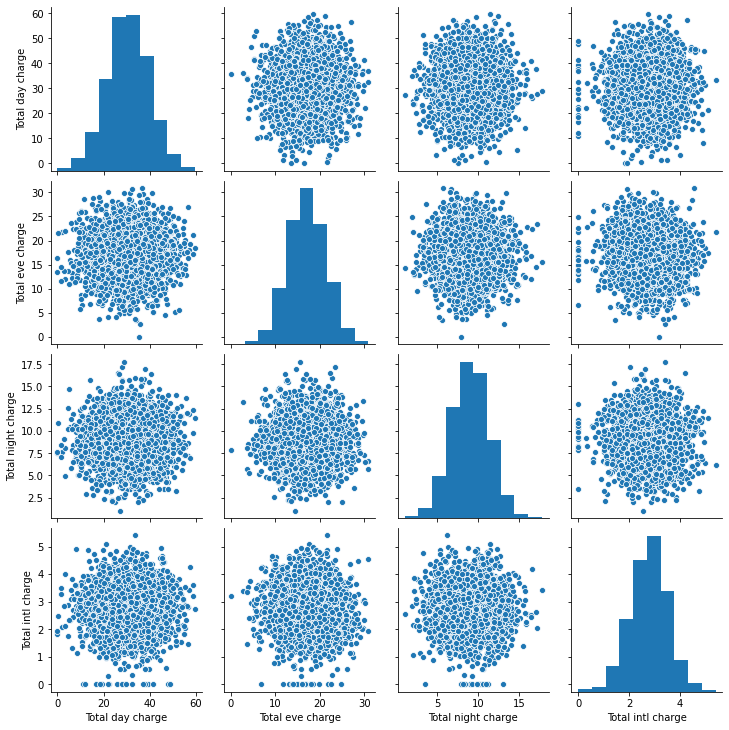

In [58]:
sns.pairplot(df[feat_charge]);

In [59]:
# При помощи словарика меняем значения в переменной Churn
df['Churn'].map({False: 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [74]:
# При помощи словарика меняем значения в переменной Churn (обратно в логический тип)
df['Churn'] = df['Churn'].map({0:False,1:True})

In [67]:
# Выделяет все строки, где названия штатов либо IN, либо WY
df[df['State'].isin(['IN',"WY"])]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
51,IN,60,408,No,No,0,220.6,57,37.50,211.1,115,17.94,249.0,129,11.21,6.8,3,1.84,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,IN,65,408,No,No,0,207.7,109,35.31,217.5,117,18.49,125.6,111,5.65,8.0,5,2.16,1,False
3292,IN,114,408,No,No,0,203.8,85,34.65,87.8,110,7.46,166.2,122,7.48,11.7,4,3.16,1,False
3305,IN,58,415,No,Yes,22,224.1,127,38.10,238.8,85,20.30,174.2,86,7.84,11.5,7,3.11,2,False
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,False


In [75]:
# Выделим столбцы, где Churn = False
df[~df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


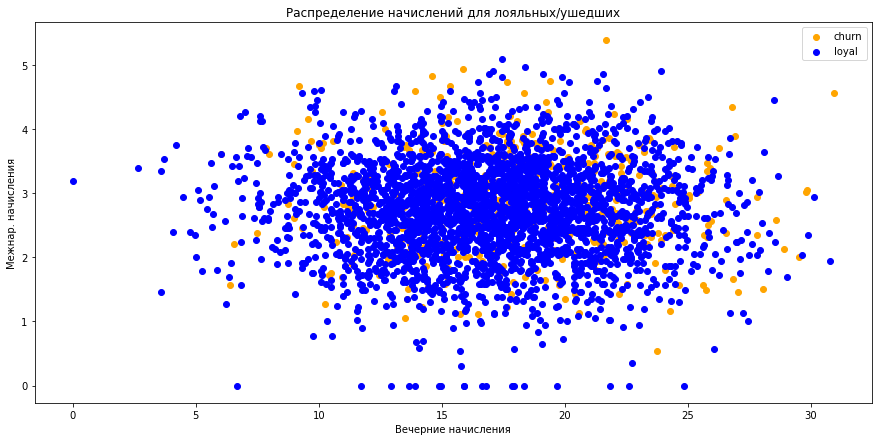

In [80]:
# Строим диаграмму рассеивания
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
# ПОдпишем оси и добавим название графика и легенду
plt.xlabel('Вечерние начисления');
plt.ylabel('Межнар. начисления');
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();

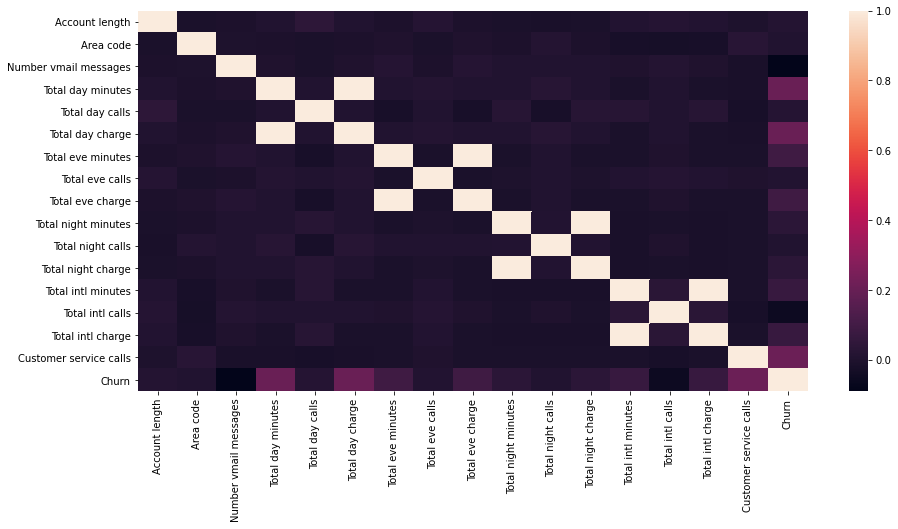

In [81]:
sns.heatmap(df.corr());

In [90]:
df.drop(feat_charge, axis=1, inplace=True)

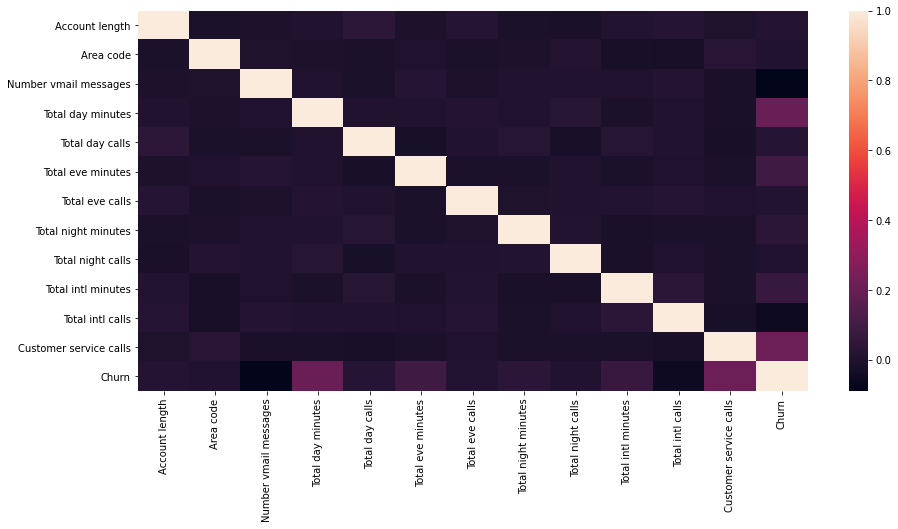

In [91]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

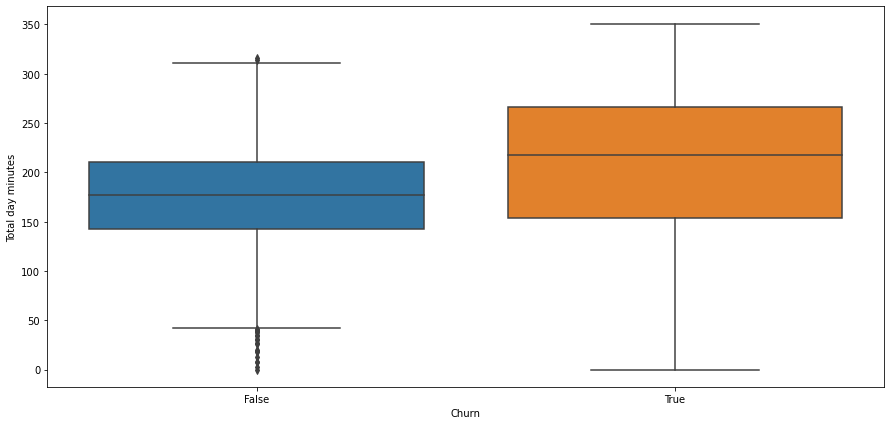

In [92]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

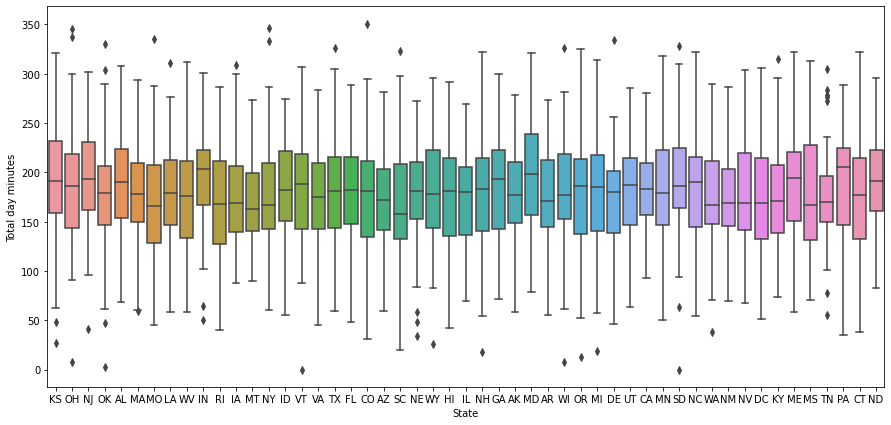

In [93]:
sns.boxplot(x='State', y='Total day minutes', data=df);

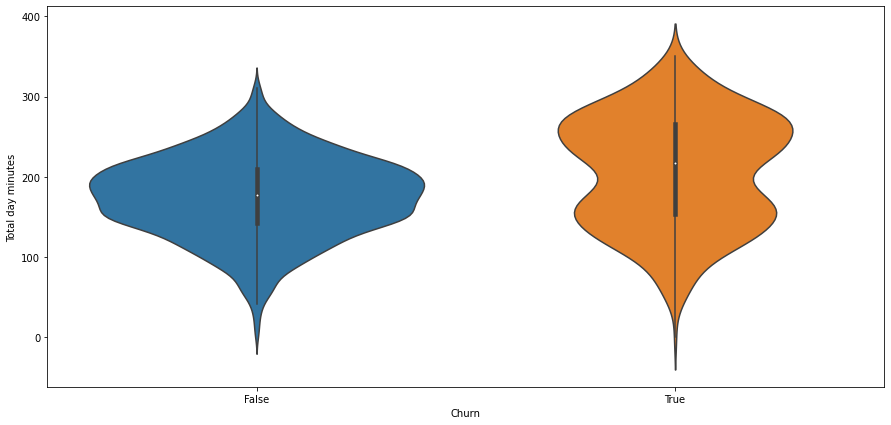

In [94]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [95]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

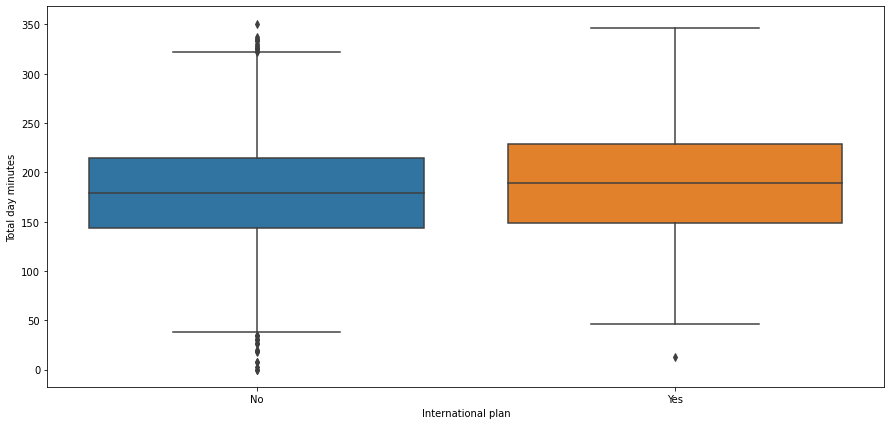

In [96]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3. Категориальный с категориальным
countplot

In [97]:
# Таблица сопряженности
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


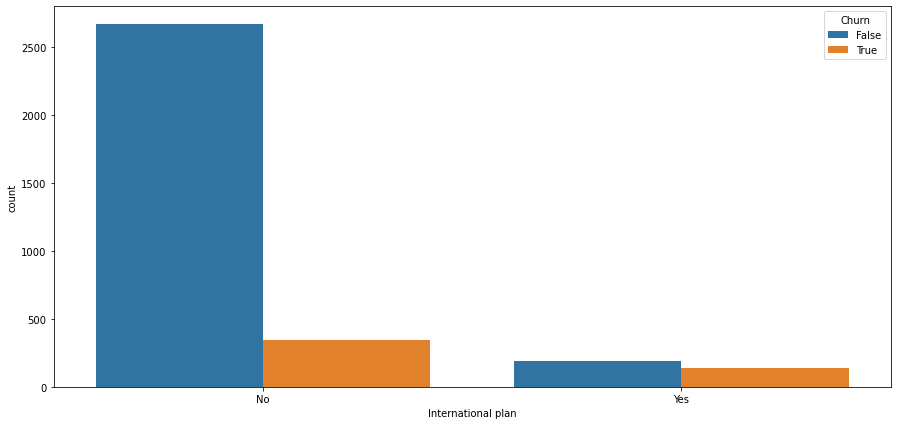

In [98]:
# Hue -  разный цвет в зависимости от значений столбца (в данном случае Churn - два значения: True и False)
sns.countplot(x='International plan', hue='Churn', data=df);

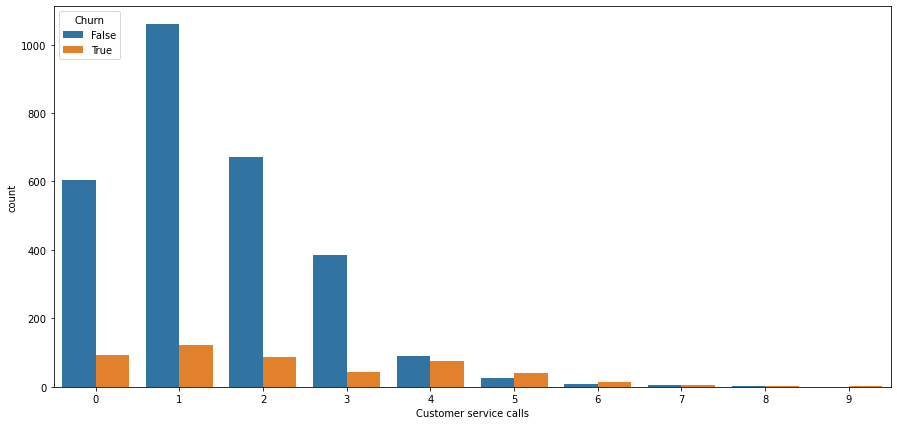

In [99]:
# Hue -  разный цвет в зависимости от значений столбца (в данном случае Churn - два значения: True и False)
sns.countplot(x='Customer service calls', hue='Churn', data=df);

 # <center> Датасет "Видеоигры"

In [100]:
df = pd.read_csv('../../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int.

In [112]:
# Трансформируем столбцы типа object в тип float (errors = 'coerce' - нечисловые значения будут заменены на NaN)
df['User_Score'] = pd.to_numeric(df.User_Score, errors = "coerce")
df['Year_of_Release'] = pd.to_numeric(df.Year_of_Release, errors = "coerce")
df['User_Count'] = pd.to_numeric(df.User_Count, errors = "coerce")
df['Critic_Count'] = pd.to_numeric(df.Critic_Count, errors = "coerce")

In [113]:
df = df.dropna()
print(df.shape)

(6825, 16)


Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [114]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8.0,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8.0,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


## Plot в пандасе

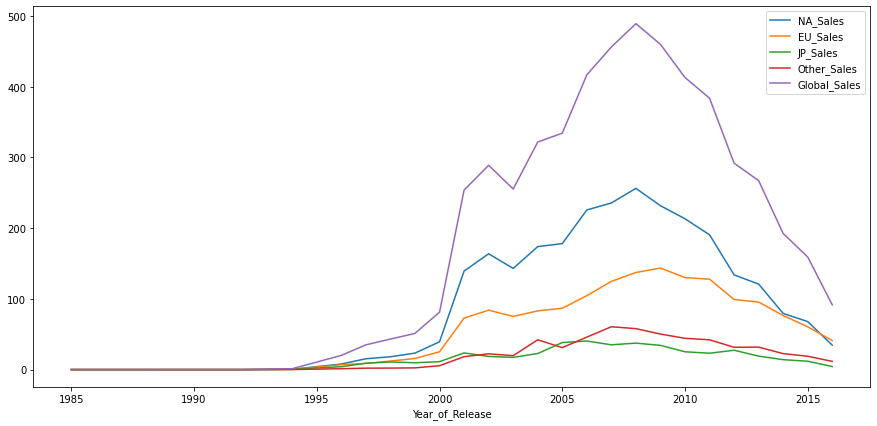

In [123]:
# Выделим столбцы, которые содержат значение Sales и добавим столбец Year_of_Realease
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot();

C помощью параметра ***kind*** можно изменить тип графика, например, на *bar chart*. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр ***rot*** отвечает за угол наклона подписей к оси x.

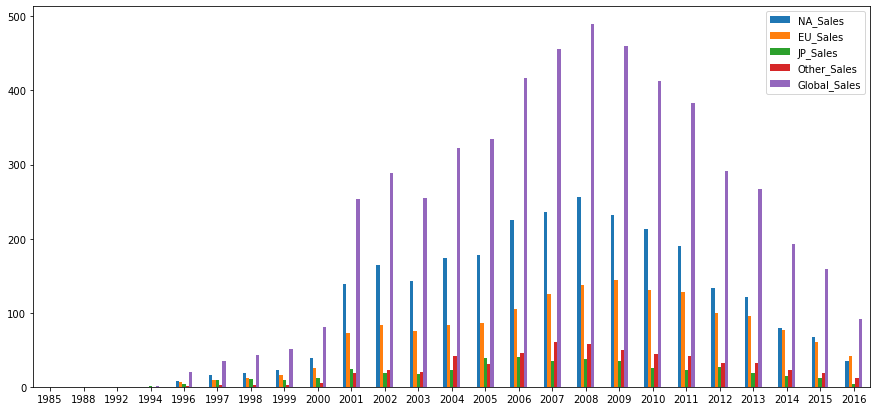

In [136]:
new_df = sales_df.groupby('Year_of_Release').sum()
new_df.index = new_df.index.astype(int)
new_df.plot(kind='bar', rot=0);

## Seaborn

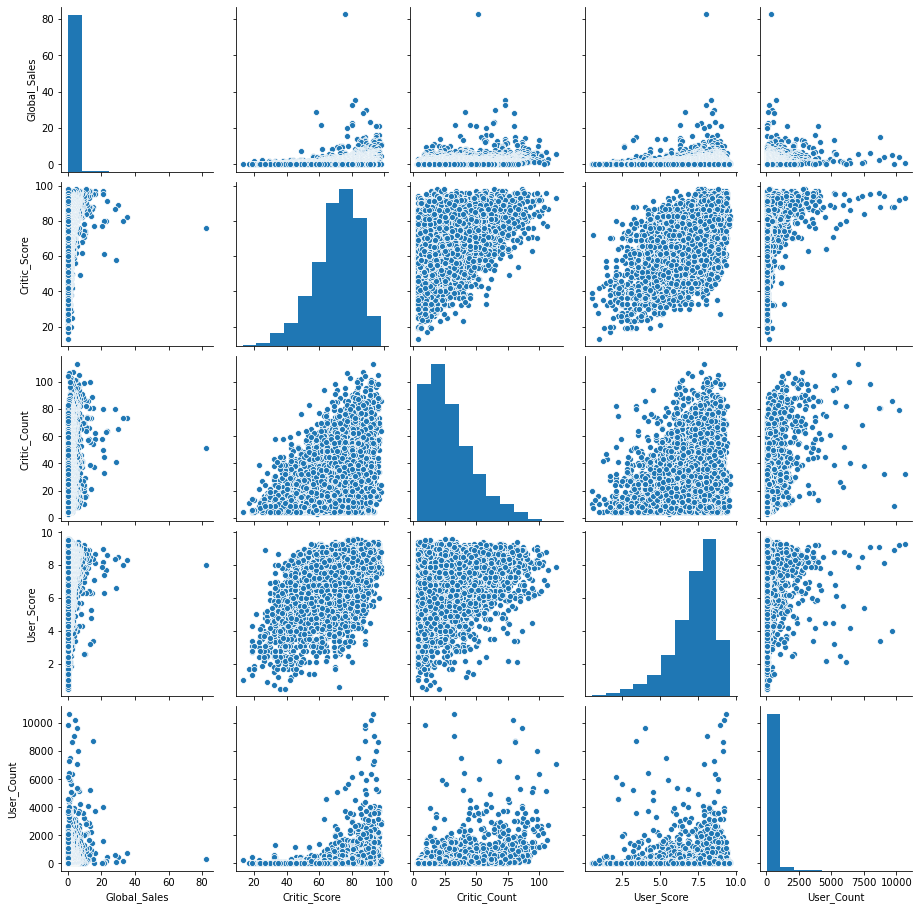

In [140]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
# Аккуратней с запуском pairplot - Jupyter может "перегреться"
sns_plot = sns.pairplot(df[cols])
# Сохранить рисунок
sns_plot.savefig('pairplot.png')

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По умолчанию на графике отображается гистограмма и kernel density estimation.

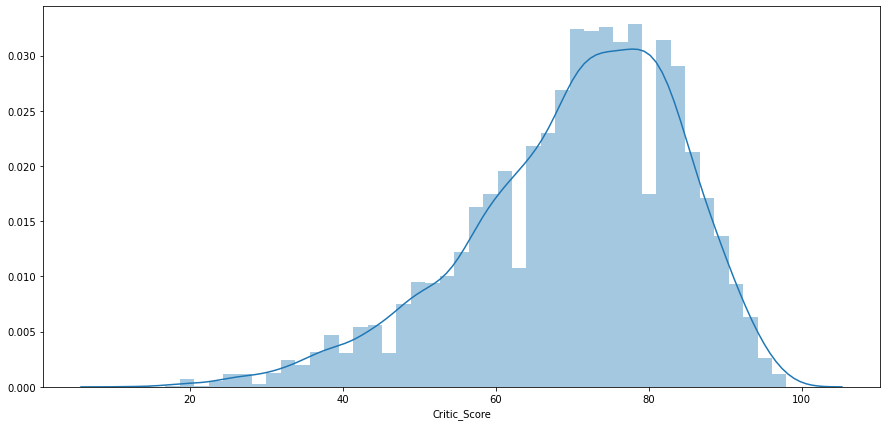

In [152]:
sns.distplot(df.Critic_Score);

Еще один полезный тип графиков — это box plot. Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

In [156]:
?sns.boxplot

In [164]:
df.Platform.value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

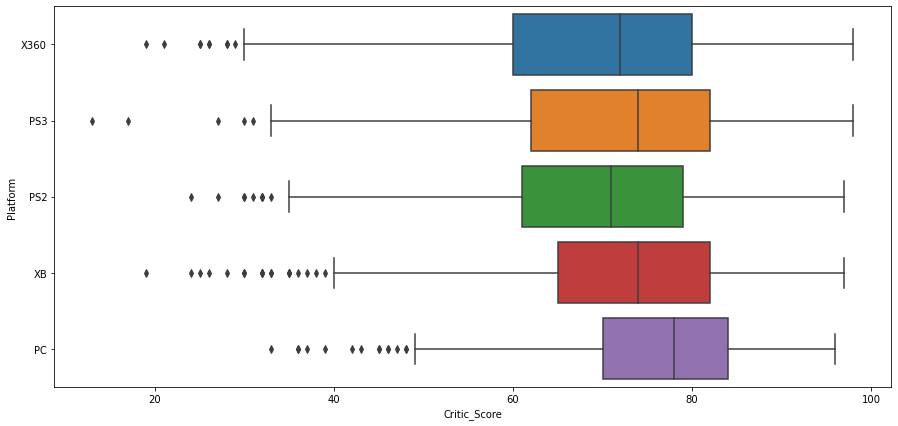

In [167]:
# Вытащим названия ТОП-5 наиболее популярных платформ
top_platforms = df.Platform.value_counts().head(5).index
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)], orient="h");

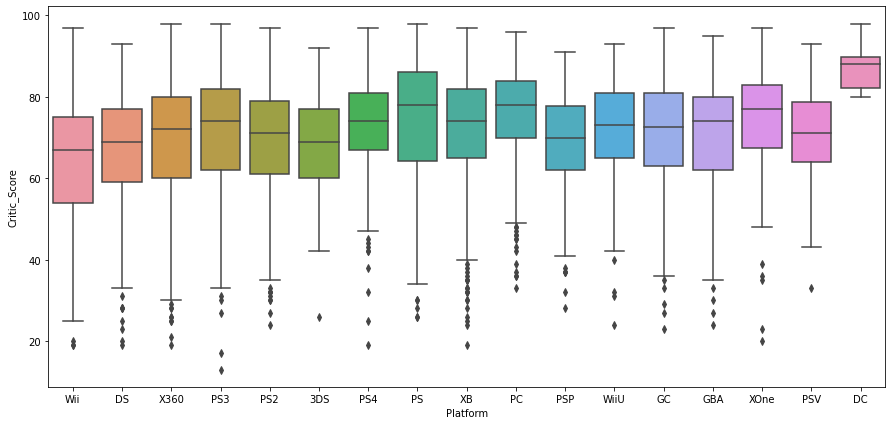

In [173]:
# Коробчатые диаграммы для всех платформ
sns.boxplot(x="Platform", y="Critic_Score", data=df, orient = "v");

Думаю, стоит обсудить немного подробнее, как же понимать box plot. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" >

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

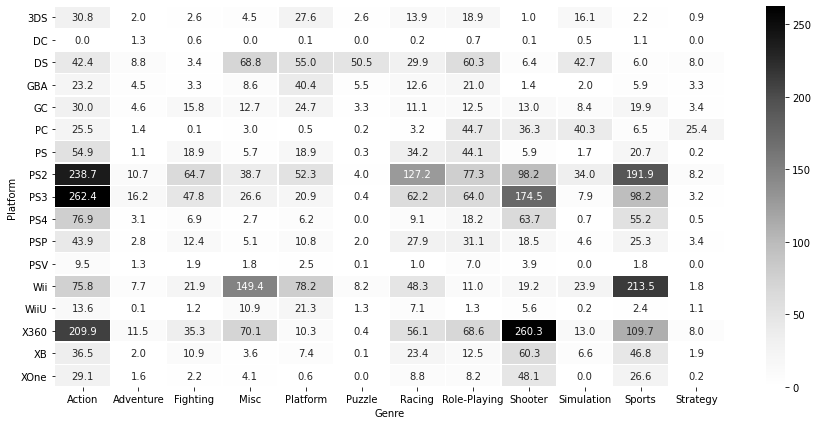

In [189]:
# Создаем сводную таблицу, где строки - платформа, столбцы - жанр, значения - глобальные продажи,
# агрегирующая  функция - сумма
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5,
           cmap = "Greys");

Важная опция - cmap - то, как у нас будут подсвечиваться значения. Список cmap можно взять отсюда (внизу).

https://matplotlib.org/tutorials/colors/colormaps.html

# <center> Практика. Графический анализ для выявления важных факторов заболеваний сердечно-сосудистой системы

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

In [ ]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [190]:
path_to_file = "/Users/iakubovskii/Machine_Learning/ML_personal_course/Pandas_Cases/"
train = pd.read_csv(path_to_file + "cardio.csv", sep = ";", index_col = "id")

In [191]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Переведем данные в "Long Format"-представление и отрисуем с помощью [factorplot](https://seaborn.pydata.org/generated/seaborn.factorplot.html) количество значений, которые принимают категориальные переменные.

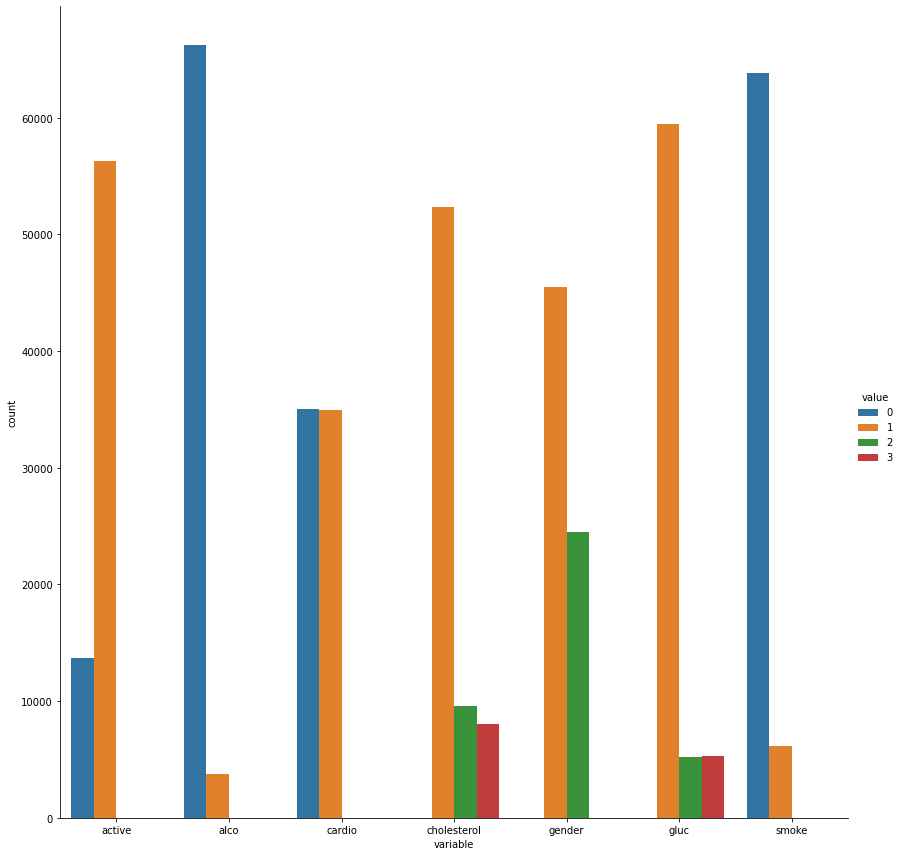

In [192]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

Видим, что классы целевой переменной `cardio` сбалансированы, отлично!

Можно также разбить элементы обучающей выборки по значениям целевой переменной: иногда на таких графиках можно сразу увидеть самый значимый признак.

Видим, что в зависимости от целевой переменной сильно меняется распределение холестерина и глюкозы. Совпадение?

**Немного статистики по уникальным значениям признаков.**

In [195]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


*Итого:*
- Пять количественных признаков (без id)
- Семь категориальных
- 70000 объектов

# 1. Визуализируем корреляционную матрицу

Для того чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками. <br>

Постройте [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) корреляционной матрицы. Матрица формируется средствами `Pandas`, со стандартным значением параметров.

###  1. Какие два признака больше всего коррелируют (по Пирсону) с признаком `height` ?

- Gluc, Cholesterol
- Weight, Alco
- Smoke, Alco
- Weight, Gender

In [ ]:
# Ваш код здесь

# 2. Распределение роста для мужчин и женщин

Как мы увидели, в процессе исследования уникальных значений пол кодируется значениями 1 и 2, расшифровка изначально не была нам дана в описании данных, но мы догадались, кто есть кто, посчитав средние значения роста (или веса) при разных значениях признака `gender`. Теперь сделаем то же самое, но графически. 

Постройте [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) для роста и пола. Используйте:
- hue – для разбивки по полу
- scale – для оценки количества каждого из полов 

Для корректной отрисовки, преобразуйте DataFrame в "Long Format"-представление с помощью функции melt в pandas.
<br>
[еще один пример](https://stackoverflow.com/a/41575149/3338479)

In [ ]:
# Ваш код здесь

Постройте на одном графике два отдельных [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) роста, отдельно для мужчин и женщин. На нем разница будет более наглядной, но нельзя будет оценить количество мужчин/женщин.

In [ ]:
# Ваш код здесь

# 3. Ранговая корреляция

В большинстве случаев достаточно воспользоваться линейным коэффициентом корреляции *Пирсона* для выявления закономерностей в данных, но мы пойдём чуть дальше и используем ранговую корреляцию, которая поможет нам выявить пары, в которых меньший ранг из вариационного ряда одного признака всегда предшествует большему другого (или наоборот, в случае отрицательной корреляции).

##### Постройте корреляционную матрицу, используя коэффициент Спирмена

### 3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?

- Height, Weight
- Age, Weight
- Ap_hi, Ap_lo
- Cholesterol, Gluc
- Cardio, Cholesterol
- Smoke, Alco

In [ ]:
# Ваш код здесь

### 3.2 Почему мы получили такое большое (относительно) значение ранговой корреляции у этих признаков?

- Неточности в данных (ошибки при сборе данных)
- Связь ошибочна, переменные никак не должны быть связаны друг с другом
- Природа данных

# 4. Совместное распределение признаков

Постройте совместный график распределения [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) двух наиболее коррелирующих между собой признаков (по Спирмену).

Кажется, наш график получился неинформативным из-за выбросов в значениях. Постройте тот же график, но с логарифмической шкалой (чтобы не получать OverflowError необходимо отфильтровать значения меньше либо равные нулю).

In [ ]:
# Ваш код здесь

# -------------------- #

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

### 4.1 Сколько чётко выраженных кластеров получилось на  совместном графике выбранных признаков, с логарифмической шкалой? Под кластером в данной задаче понимается плотное скопление точек, в окрестности которого пренебрежительно мало одиночных наблюдений и которое визуально отделимо от других кластеров.

- 1
- 2
- 3
- больше трёх

In [ ]:
# Ваш код здесь

# 5. Возраст

Посчитаем, сколько полных лет было респондентам на момент их занесения в базу.

In [ ]:
train['age_years'] = (train['age'] // 365.25).astype(int)

Постройте [Countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html), где на оси абсцисс будет отмечен возраст, на оси ординат – количество. Каждое значение возраста должно иметь два столбца, соответствующих количеству человек каждого класса **cardio** (здоров/болен) данного возраста.

### 5. В каком возрасте количество пациентов с ССЗ  впервые становится больше, чем здоровых?
- 44
- 49
- 53
- 62

In [ ]:
# Ваш код здесь